In [1]:
import astropy.io.fits as pyfits
from astropy import table
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

In [3]:
data = pyfits.open('./atlas_v4_input.fits')[1].data

In [7]:
c2 = data[data['cmd'] == 1]
c3 = c2[abs(c2['del_beta']) < 0.3]
c3 = c3[c3['WAVG_MAG_PSF_R0']  < 19.3]

In [8]:
ctemp = c3[(c3['parallax'] - 2.*c3['parallax_error']) < 0 ]

E:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [9]:
print(len(data), len(c2), len(c3), len(ctemp))

(712308, 25557, 1130, 554)


In [10]:
def plum (r, rh, rmax):
    n = rmax**2/(r**2 + rmax**2)
    return (1.+(r/rh)**2 )**-2 / (np.pi * rh**2)/n
def mw(r, rmax):
    return 1./(np.pi*rmax**2)
def plum_ellipticity (r, rh, rmax, q):
    n = rmax**2/(r**2 + rmax**2)
    return (1.+(r/rh)**2 )**-2 / (np.pi * rh**2 * q)/n
def gauss_rmax (r, rh, rmax):
    n = 2.*(1. - np.exp(-rmax**2/2./rh**2))* np.pi*rh**2
    return np.exp(-.5 * (r/rh)**2 ) /n

def gc_dist(ra, dec, dist):
    gc = SkyCoord(ra=266.40498829*u.degree, dec=-28.93617776*u.degree, distance = 8.5*u.kpc, frame='icrs')
    c = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, distance = dist*u.kpc, frame='icrs')

    x = (c.cartesian.x.value - gc.cartesian.x.value)**2
    y = (c.cartesian.y.value - gc.cartesian.y.value)**2
    z = (c.cartesian.z.value - gc.cartesian.z.value)**2
    d = np.sqrt(x + y + z)
    return d

In [11]:
ctemp = table.Table(ctemp)

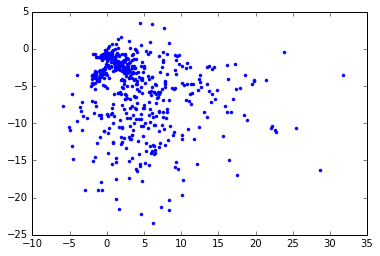

In [12]:
plt.plot(ctemp['pmra'], ctemp['pmdec'],'.')

In [13]:
pdtemp = ctemp['pmra', 'pmdec', 'pmra_error', 'pmdec_error'].to_pandas()

In [14]:
train = pdtemp[['pmra', 'pmdec']]

In [19]:
covar_type = 'full'
classifier = GaussianMixture(n_components=2, covariance_type =covar_type, init_params='random', max_iter=20)
#classifier.fit(train)

In [20]:
classifier.fit(train)

GaussianMixture(covariance_type='full', init_params='random', max_iter=20,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [21]:
classifier.means_

array([[ 2.07547041, -5.77791954],
       [ 8.65266769, -4.75035341]])

In [29]:
classifier.weights_

array([0.71968017, 0.28031983])

In [4]:
def make_ellipses(gmm, ax):
    for n, color in enumerate('rbg'):
        covariances = gmm.covariances_[n][:2, :2]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

NameError: name 'train' is not defined

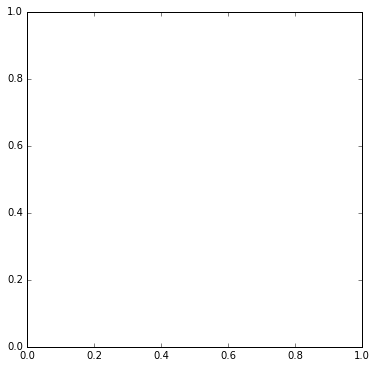

In [5]:
plt.figure(figsize=[6,6])
f1s1 = plt.subplot(111)
f1s1.scatter(train['pmra'], train['pmdec'], 0.8)
make_ellipses(classifier, f1s1)

In [206]:
data = table.Table(pyfits.open('./atlas_v99.fits')[1].data)
#data = table.Table(pyfits.open('./AliqaUma_v99.fits')[1].data)
data = data.to_pandas()

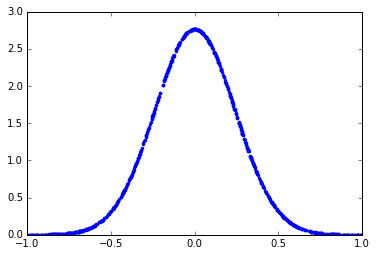

In [138]:
plt.plot(data['del_beta'], data['prob_dsph_axis'],'.')

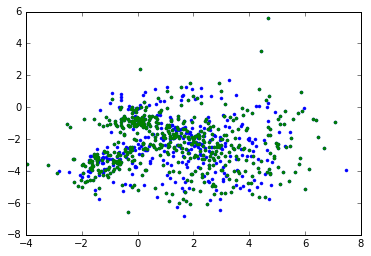

In [139]:
sel = abs(data['del_beta']) < 0.6
plt.plot(data['pmra'], data['pmdec'],'.')
plt.plot(data['pmra'][sel], data['pmdec'][sel],'.')

In [140]:
covar_type = 'full'
classifier = GaussianMixture(n_components=3, covariance_type=covar_type, random_state=None, init_params='random', n_init=5, max_iter=10000, tol=1e-15)

In [142]:
pdtemp = data[['pmra', 'pmdec', 'pmra_error', 'pmdec_error']]
train = pdtemp[['pmra', 'pmdec']][sel]
classifier.fit(train)

GaussianMixture(covariance_type='full', init_params='random', max_iter=10000,
        means_init=None, n_components=3, n_init=5, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=1e-15, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [143]:
classifier.converged_

True

In [144]:
classifier.n_iter_

243

In [145]:
classifier.means_

array([[ 2.08105541, -2.3011212 ],
       [-1.17576862, -3.5469797 ],
       [-0.05493983, -0.9090929 ]])

In [106]:
classifier.covariances_

array([[[ 3.57761841, -0.13104089],
        [-0.13104089,  2.86055142]],

       [[ 0.18236425,  0.01230579],
        [ 0.01230579,  0.05005275]],

       [[ 0.37311936,  0.22098192],
        [ 0.22098192,  0.40813863]]])

In [107]:
classifier.weights_

array([0.70250046, 0.14792422, 0.14957532])

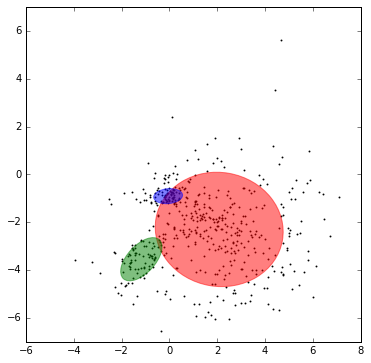

In [108]:
plt.figure(figsize=[6,6])
f1s1 = plt.subplot(111)
f1s1.scatter(train['pmra'], train['pmdec'], 0.8)
make_ellipses(classifier, f1s1)

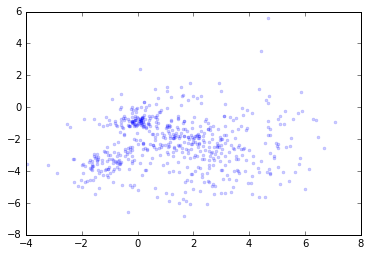

In [295]:
plt.plot(data['pmra'][sel], data['pmdec'][sel],'.', alpha=0.2)

In [10]:
data = table.Table(pyfits.open('./AliqaUma_v99.fits')[1].data)
data = data.to_pandas()

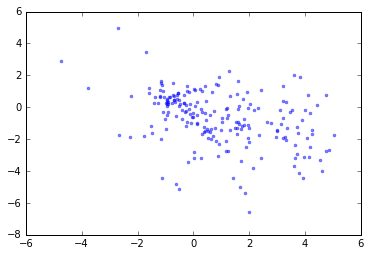

In [11]:
#sel = abs(data['']) < 0.6
plt.plot(data['PMRA'], data['PMDEC'],'.', alpha=0.5)
#plt.plot(data['pmra'][sel], data['pmdec'][sel],'.')

In [13]:
train = data[['PMRA', 'PMDEC']]
covar_type = 'full'
classifier = GaussianMixture(n_components=3, covariance_type=covar_type, random_state=None, init_params='random', n_init=5, max_iter=10000, tol=1e-15)
classifier.fit(train)

GaussianMixture(covariance_type='full', init_params='random', max_iter=10000,
        means_init=None, n_components=3, n_init=5, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=1e-15, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [14]:
classifier.converged_
classifier.n_iter_

243

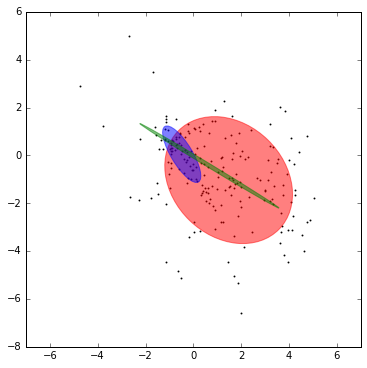

In [15]:
plt.figure(figsize=[6,6])
f1s1 = plt.subplot(111)
f1s1.scatter(train['PMRA'], train['PMDEC'], 0.8)
make_ellipses(classifier, f1s1)

In [16]:
classifier.means_

array([[ 1.47580241, -1.02911551],
       [-0.48713975,  0.05389584],
       [ 0.67169898, -0.43169876]])

In [17]:
classifier.covariances_

array([[[ 3.56617383, -0.78818061],
        [-0.78818061,  3.5234509 ]],

       [[ 0.31893046, -0.36391805],
        [-0.36391805,  0.69948427]],

       [[ 4.24385365, -2.57446361],
        [-2.57446361,  1.56613804]]])

In [202]:
classifier.weights_

array([0.13052337, 0.57111777, 0.29835886])